In [5]:
#import the libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [6]:
#load the dataset
df1=pd.read_csv(r"C:\Users\Admin\Desktop\Datasets\teams.csv")
df1

,team,country,year,events,athletes,age,height,weight,medals,prev_medals,prev_3_medals
0,AFG,Afghanistan,1964,8,8,22.0,161.0,64.2,0,0.0,0.0
1,AFG,Afghanistan,1968,5,5,23.2,170.2,70.0,0,0.0,0.0
2,AFG,Afghanistan,1972,8,8,29.0,168.3,63.8,0,0.0,0.0
3,AFG,Afghanistan,1980,11,11,23.6,168.4,63.2,0,0.0,0.0
4,AFG,Afghanistan,2004,5,5,18.6,170.8,64.8,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2139,ZIM,Zimbabwe,2000,19,26,25.0,179.0,71.1,0,0.0,0.0
2140,ZIM,Zimbabwe,2004,11,14,25.1,177.8,70.5,3,0.0,0.0
2141,ZIM,Zimbabwe,2008,15,16,26.1,171.9,63.7,4,3.0,1.0
2142,ZIM,Zimbabwe,2012,8,9,27.3,174.4,65.2,0,4.0,2.3


In [7]:
df=df1[['team', 'country', 'year', 'athletes', 'age',
        'medals', 'prev_medals']]
df

,team,country,year,athletes,age,medals,prev_medals
0,AFG,Afghanistan,1964,8,22.0,0,0.0
1,AFG,Afghanistan,1968,5,23.2,0,0.0
2,AFG,Afghanistan,1972,8,29.0,0,0.0
3,AFG,Afghanistan,1980,11,23.6,0,0.0
4,AFG,Afghanistan,2004,5,18.6,0,0.0
...,...,...,...,...,...,...,...
2139,ZIM,Zimbabwe,2000,26,25.0,0,0.0
2140,ZIM,Zimbabwe,2004,14,25.1,3,0.0
2141,ZIM,Zimbabwe,2008,16,26.1,4,3.0
2142,ZIM,Zimbabwe,2012,9,27.3,0,4.0


In [8]:
df.columns

Index(['team', 'country', 'year', 'athletes', 'age', 'medals', 'prev_medals'], dtype='object')

In [9]:
#shape of the df
df.shape

(2144, 7)

In [10]:
#info of the df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2144 entries, 0 to 2143
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   team         2144 non-null   object 
 1   country      2144 non-null   object 
 2   year         2144 non-null   int64  
 3   athletes     2144 non-null   int64  
 4   age          2144 non-null   float64
 5   medals       2144 non-null   int64  
 6   prev_medals  2014 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 117.4+ KB


In [11]:
#checking for null values
df.isnull().sum()

team             0
country          0
year             0
athletes         0
age              0
medals           0
prev_medals    130
dtype: int64

In [12]:
#Handling the null values
df=df.dropna()

In [13]:
df.isnull().sum()

team           0
country        0
year           0
athletes       0
age            0
medals         0
prev_medals    0
dtype: int64

In [14]:
#correlation for the feature variable and target variables
df.select_dtypes(include='number').corr()['medals']

year          -0.034870
athletes       0.839909
age            0.023231
medals         1.000000
prev_medals    0.920048
Name: medals, dtype: float64

In [17]:
#summary statistics for the dataframe
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,2014.0,1995.227408,15.227727,1964.0,1984.0,1996.0,2008.00,2016.0
athletes,2014.0,76.329692,129.799427,1.0,7.0,21.0,74.75,839.0
age,2014.0,24.812612,2.758258,17.0,23.3,24.7,26.10,66.0
medals,2014.0,10.990070,33.627528,0.0,0.0,0.0,5.00,442.0
prev_medals,2014.0,10.248759,31.951920,0.0,0.0,0.0,4.00,442.0


<Figure size 1000x600 with 0 Axes>

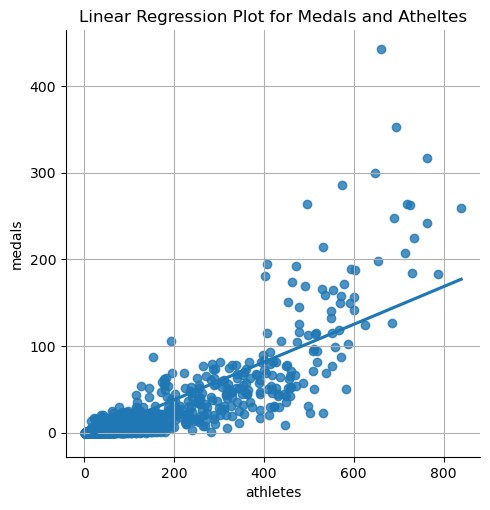

In [18]:
#linear regresion plot for medals and athletes
plt.figure(figsize=(10,6))
sns.lmplot(x='athletes', y='medals', data=df, fit_reg=True, ci=None)
plt.title('Linear Regression Plot for Medals and Atheltes')
plt.grid(True)
plt.show()

There is a positive relationship in the number of a atheletes a country enters in the olympics and the medals it gets.

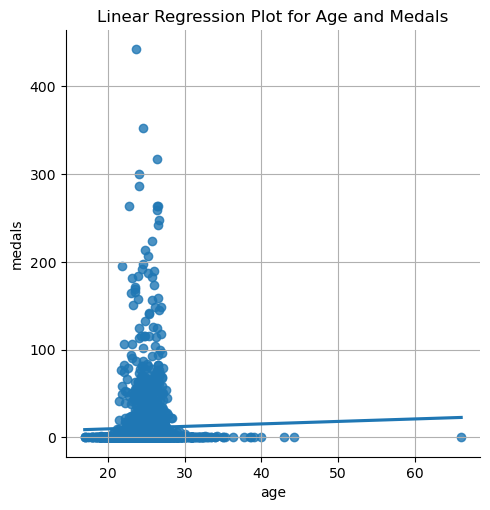

In [19]:
#linear regression plot for medals and age
sns.lmplot(x='age', y='medals', data=df, fit_reg=True, ci=None)
plt.title('Linear Regression Plot for Age and Medals')
plt.grid(True)
plt.show()

There is no significant relationship between age and the number of medals a country gets in the olympics.

In [20]:
#splitting the data into test and split data with regard that our data is a time series data
train=df[df['year']<2012].copy()
test=df[df['year']>=2012].copy()

In [21]:
train.shape

(1609, 7)

In [22]:
test.shape

(405, 7)

MODEL BUILDING

In [23]:
#using linear regression to create the model
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [24]:
predictors=['athletes','prev_medals']
target='medals'

In [25]:
#Applying the model to make prediction
lr.fit(train[predictors],train['medals'])

LinearRegression()

In [26]:
predictions=lr.predict(test[predictors])
predictions

array([-9.61221245e-01, -1.17633261e+00, -1.42503158e+00, -1.71184673e+00,
        2.15562926e+00,  3.91463636e+00, -1.71184673e+00, -1.85525431e+00,
        3.67563128e-01, -2.77770967e-01, -1.85525431e+00, -1.49673537e+00,
        4.67519911e+01,  2.87550937e+01,  4.58450091e+00,  2.54773581e+00,
       -1.85525431e+00, -1.64014295e+00, -1.85525431e+00, -1.85525431e+00,
        1.46556876e+02,  1.20571799e+02,  6.56314795e+00,  3.95275254e+00,
        7.34283247e+00,  1.03117468e+01,  5.19171882e+00,  3.58517645e+00,
       -1.64014295e+00, -1.64014295e+00, -1.56843916e+00, -1.20992022e+00,
       -1.71184673e+00, -1.42503158e+00,  1.17929959e+01,  1.00049298e+01,
       -1.78355052e+00, -1.71184673e+00, -1.56843916e+00, -1.56843916e+00,
       -1.99866189e+00, -1.99866189e+00, -1.56843916e+00, -1.35332779e+00,
       -1.92695810e+00, -1.92695810e+00,  3.28912706e+01,  2.53042547e+01,
       -1.78355052e+00, -1.28162400e+00, -1.85525431e+00, -3.87590939e-01,
        7.83480779e+01,  

In [27]:
#gettng rid of negatives in the array and rounding off 
test['predictions']=predictions
test

,team,country,year,athletes,age,medals,prev_medals,predictions
6,AFG,Afghanistan,2012,6,24.8,1,1.0,-0.961221
7,AFG,Afghanistan,2016,3,24.7,0,1.0,-1.176333
24,ALB,Albania,2012,10,25.7,0,0.0,-1.425032
25,ALB,Albania,2016,6,23.7,0,0.0,-1.711847
37,ALG,Algeria,2012,39,24.8,1,2.0,2.155629
...,...,...,...,...,...,...,...,...
2111,YEM,Yemen,2016,3,19.3,0,0.0,-1.926958
2131,ZAM,Zambia,2012,7,22.6,0,0.0,-1.640143
2132,ZAM,Zambia,2016,7,24.1,0,0.0,-1.640143
2142,ZIM,Zimbabwe,2012,9,27.3,0,4.0,1.505767


In [28]:
test.loc[test['predictions'] < 0, 'predictions']=0

In [29]:
test['predictions']=test['predictions'].round()

In [30]:
test

,team,country,year,athletes,age,medals,prev_medals,predictions
6,AFG,Afghanistan,2012,6,24.8,1,1.0,0.0
7,AFG,Afghanistan,2016,3,24.7,0,1.0,0.0
24,ALB,Albania,2012,10,25.7,0,0.0,0.0
25,ALB,Albania,2016,6,23.7,0,0.0,0.0
37,ALG,Algeria,2012,39,24.8,1,2.0,2.0
...,...,...,...,...,...,...,...,...
2111,YEM,Yemen,2016,3,19.3,0,0.0,0.0
2131,ZAM,Zambia,2012,7,22.6,0,0.0,0.0
2132,ZAM,Zambia,2016,7,24.1,0,0.0,0.0
2142,ZIM,Zimbabwe,2012,9,27.3,0,4.0,2.0


MODEL PERFORMANCE EVALUATION

In [31]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
ma_error=mean_absolute_error(test['medals'],test['predictions'])
ms_error=mean_squared_error(test['medals'],test['predictions'])
Score=r2_score(test['medals'],test['predictions'])
print('MAE:',ma_error)
print('MSE:',ms_error)
print('R2 Score:',Score)

MAE: 3.2987654320987656
MSE: 65.42222222222222
R2 Score: 0.9210409414691608


In [ ]:
plt.figure(figsize=(20,20))
plt.scatter(x=target, y=predictors, alpha=0.5, c='green')
z=np.polyfit(target,predictors,1)
p=np.poly1d(z)
plt.plot(predictors, p(predictors), c='red' )
plt.xlabel('Actual_Values(y_test)')
plt.ylabel('Predicted_Values (lr_y_pred)')
plt.show()

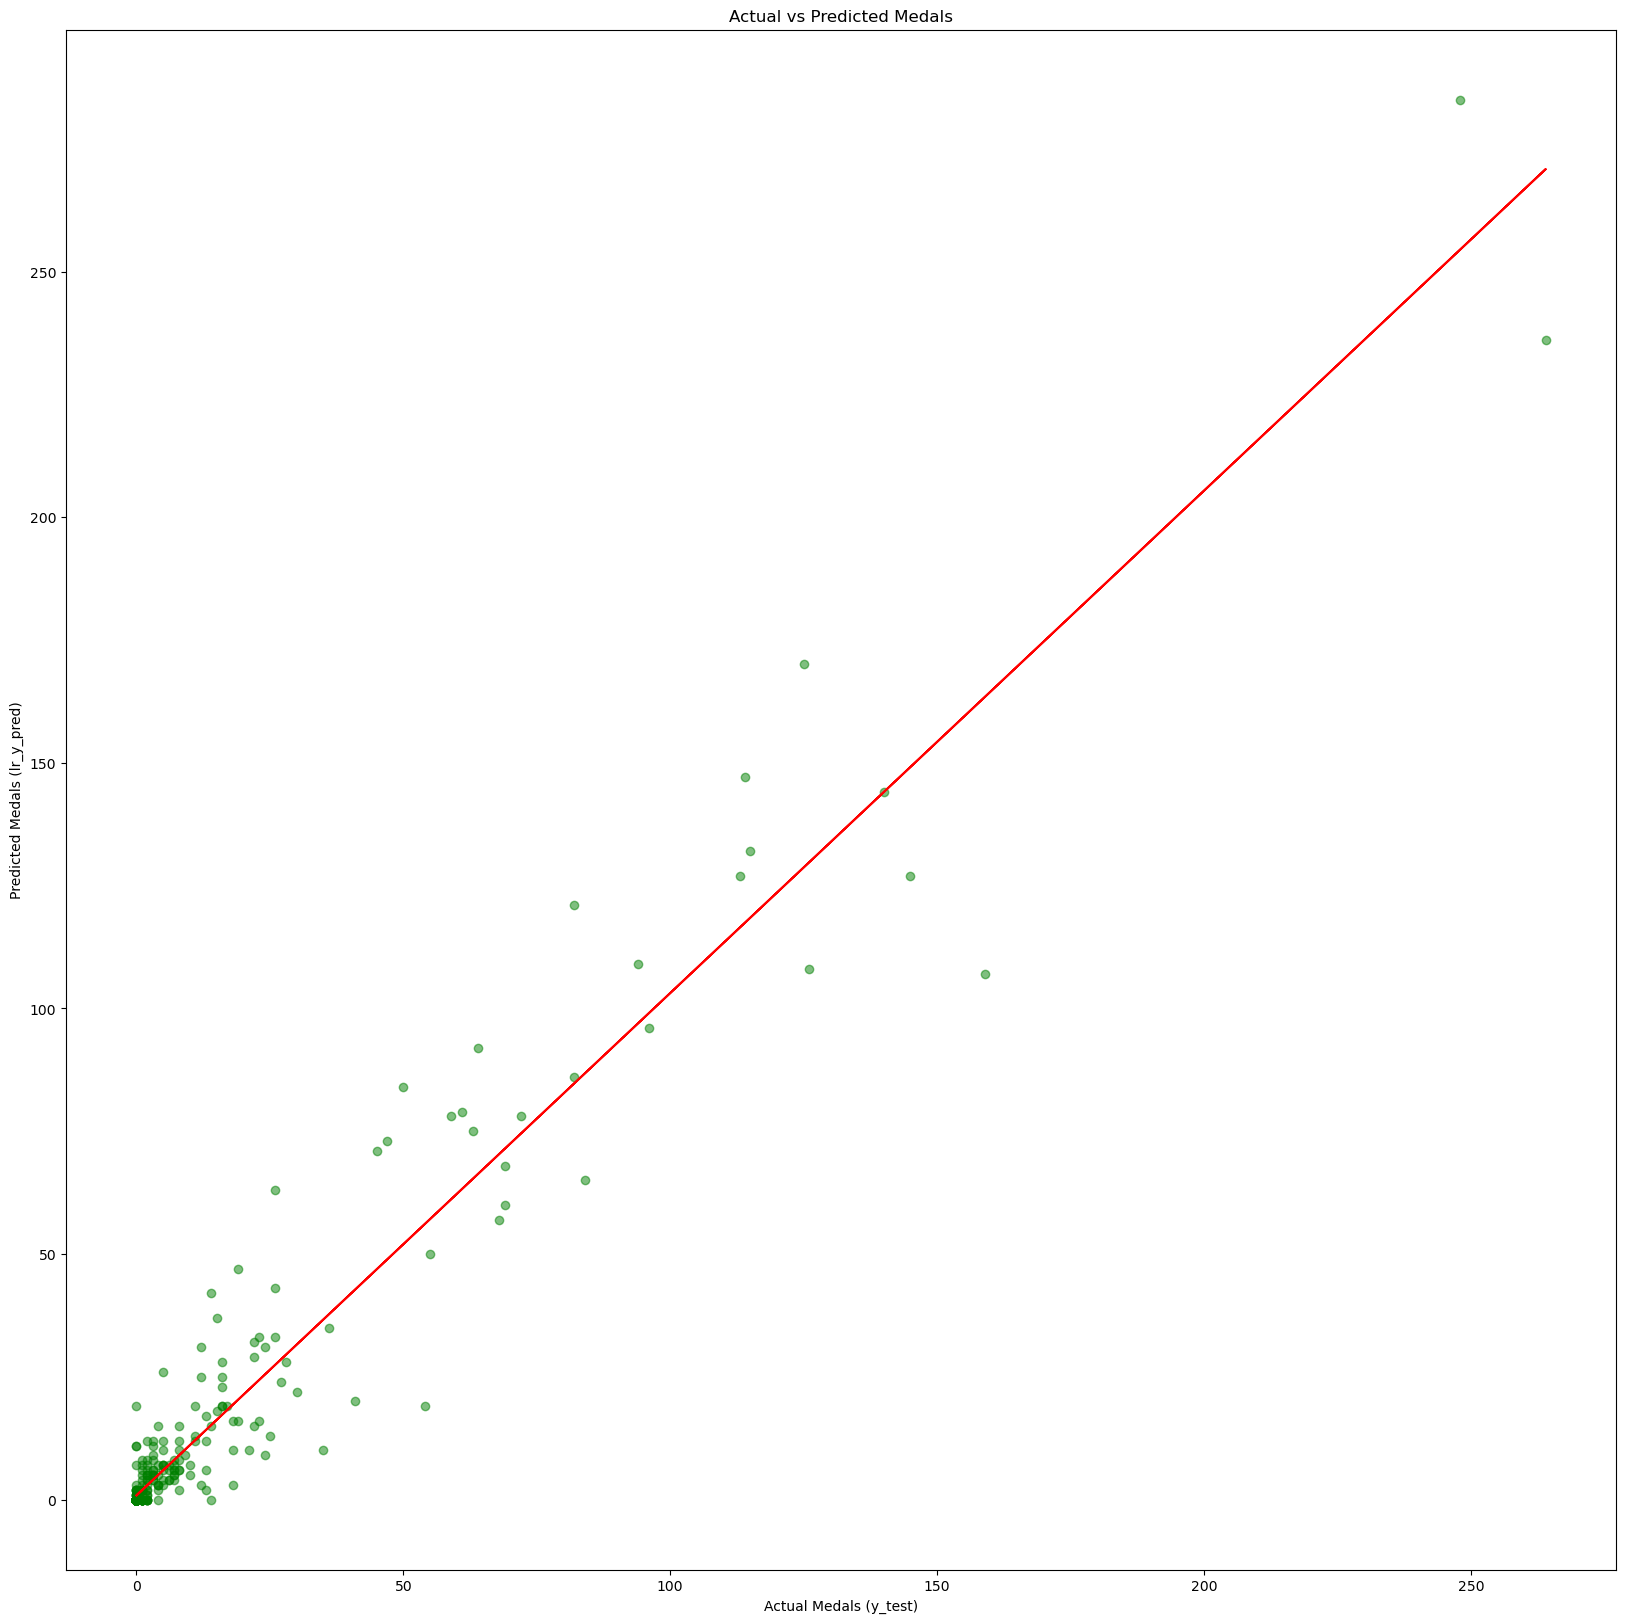

In [33]:
import matplotlib.pyplot as plt
import numpy as np

# Extract the actual and predicted values
actual = test['medals']
predicted = test['predictions']

# Create a scatter plot
plt.figure(figsize=(20, 20))
plt.scatter(x=actual, y=predicted, alpha=0.5, c='green')

# Fit a linear regression line (optional but adds a trendline to your plot)
z = np.polyfit(actual, predicted, 1)  # Fit a first-degree polynomial (linear)
p = np.poly1d(z)  # Create a polynomial object

# Plot the linear fit line
plt.plot(actual, p(actual), c='red')  # Plot the trend line based on the fitted values

# Add labels and title
plt.xlabel('Actual Medals')
plt.ylabel('Predicted Medals')
plt.title('Actual vs Predicted Medals')

# Show the plot
plt.show()


Model Performance Interpretation
1. Mean Absolute Error (MAE): 3.30 The Mean Absolute Error (MAE) of 3.30 suggests that, on average, the model's predictions deviate by approximately 3.30 medals from the actual values. This level of error indicates that while the model's predictions are generally close to the actual outcomes, there is still some degree of average prediction error. Depending on the context of the problem—such as the range of medals or the importance of precision—this value can be considered acceptable or may require further improvement.

2. Mean Squared Error (MSE): 65.42 The Mean Squared Error (MSE) of 65.42 shows that the average squared difference between the predicted and actual values is 65.42. This higher value of MSE suggests that there are some substantial discrepancies between the predicted and actual medals, as MSE penalizes larger errors more severely due to the squaring term. While this metric helps to highlight the impact of larger errors, its sensitivity to outliers means that it should be considered alongside other metrics.

3. R² Score: 0.92 An R² score of 0.92 indicates that 92% of the variance in the number of medals can be explained by the model. This is a very high R² value, demonstrating that the model explains a significant portion of the variability in the data. Such a high R² score suggests that the model has a strong fit and is effective in capturing the underlying patterns related to the number of medals.

In [151]:
test[test['team']=='USA']

,team,country,year,athletes,age,medals,prev_medals,predictions
2053,USA,United States,2012,689,26.7,248,317.0,285.0
2054,USA,United States,2016,719,26.4,264,248.0,236.0
